In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re
import requests
from bs4 import BeautifulSoup as bs

# Downloading Reviews for Iphone15promax from Amazon

In [2]:
Iphone15promax=[]

In [3]:
for i in range (1,35):
    Ip=[]
    url ="https://www.amazon.in/Apple-iPhone-Pro-Max-256/product-reviews/B0CHX68YG9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        Ip.append(reviews[i].text)
    Iphone15promax = Iphone15promax+Ip

In [4]:
Iphone15promax = list(set(Iphone15promax))
Iphone15promax

['',
 '\nLightning fast,titanium tantrums\n',
 "\nI have purchased natural titanium and it's really awesome. My first phone purchased with my hardwork.\n",
 '\nThis is my 1 st pro iPhone. And so far I’m really impressed with the performance and simplicity of the product.\n',
 '\nBattery 10/10Cemra 10/10Performance 10/10Disign 10/10Display 10/10Agar pese hai to isse Badiya phone nahi hai market ne Phil haal\n',
 '\nbest iphone ever used\n',
 '\nFast charging\n',
 '\nPerformance very strong Charging\n',
 '\nIt’s a fantastic phone…the feel and comfort in hand is awesome…looks stunning…also the brand appeal of Apple is fabulous. Camera is the best, performance is over the top…really fast and the games you can play are of play station’s…can any other phone do that…also the video quality is very nice…\n',
 '\nCamera Quality not good\n']

# Data Cleaning

In [5]:
Iphone15promax_upd = ' '.join(Iphone15promax)

In [6]:
Iphone15promax_upd = re.sub("[^A-Za-z" "]+"," ",Iphone15promax_upd).lower() #remove special character
Iphone15promax_upd = re.sub("[0-9" "]+"," ",Iphone15promax_upd).lower() #remove numbers
Iphone15promax_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', Iphone15promax_upd).lower() #remove hyperlink
Iphone15promax_upd

' lightning fast titanium tantrums i have purchased natural titanium and it s really awesome my first phone purchased with my hardwork this is my st pro iphone and so far i m really impressed with the performance and simplicity of the product battery cemra performance disign display agar pese hai to isse badiya phone nahi hai market ne phil haal best iphone ever used fast charging performance very strong charging it s a fantastic phone the feel and comfort in hand is awesome looks stunning also the brand appeal of apple is fabulous camera is the best performance is over the top really fast and the games you can play are of play station s can any other phone do that also the video quality is very nice camera quality not good '

In [7]:
Tokens = word_tokenize(Iphone15promax_upd)
Tokens

['lightning',
 'fast',
 'titanium',
 'tantrums',
 'i',
 'have',
 'purchased',
 'natural',
 'titanium',
 'and',
 'it',
 's',
 'really',
 'awesome',
 'my',
 'first',
 'phone',
 'purchased',
 'with',
 'my',
 'hardwork',
 'this',
 'is',
 'my',
 'st',
 'pro',
 'iphone',
 'and',
 'so',
 'far',
 'i',
 'm',
 'really',
 'impressed',
 'with',
 'the',
 'performance',
 'and',
 'simplicity',
 'of',
 'the',
 'product',
 'battery',
 'cemra',
 'performance',
 'disign',
 'display',
 'agar',
 'pese',
 'hai',
 'to',
 'isse',
 'badiya',
 'phone',
 'nahi',
 'hai',
 'market',
 'ne',
 'phil',
 'haal',
 'best',
 'iphone',
 'ever',
 'used',
 'fast',
 'charging',
 'performance',
 'very',
 'strong',
 'charging',
 'it',
 's',
 'a',
 'fantastic',
 'phone',
 'the',
 'feel',
 'and',
 'comfort',
 'in',
 'hand',
 'is',
 'awesome',
 'looks',
 'stunning',
 'also',
 'the',
 'brand',
 'appeal',
 'of',
 'apple',
 'is',
 'fabulous',
 'camera',
 'is',
 'the',
 'best',
 'performance',
 'is',
 'over',
 'the',
 'top',
 'really'

In [8]:
len(Tokens)

132

In [9]:
#Importing Stop Words
with open("D:/Data-Science/Assignment/Text Mining/stop.txt","r") as pw:
    Stop_words = pw.read().split("\n")
Stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [10]:
Tokens_without_sw = [word for word in Tokens if not word in Stop_words]
Tokens_without_sw

['lightning',
 'fast',
 'titanium',
 'tantrums',
 'purchased',
 'natural',
 'titanium',
 'awesome',
 'phone',
 'purchased',
 'hardwork',
 'st',
 'pro',
 'iphone',
 'impressed',
 'performance',
 'simplicity',
 'product',
 'battery',
 'cemra',
 'performance',
 'disign',
 'display',
 'agar',
 'pese',
 'hai',
 'isse',
 'badiya',
 'phone',
 'nahi',
 'hai',
 'market',
 'ne',
 'phil',
 'haal',
 'iphone',
 'fast',
 'charging',
 'performance',
 'strong',
 'charging',
 'fantastic',
 'phone',
 'feel',
 'comfort',
 'hand',
 'awesome',
 'stunning',
 'brand',
 'appeal',
 'apple',
 'fabulous',
 'camera',
 'performance',
 'top',
 'fast',
 'games',
 'play',
 'play',
 'station',
 'phone',
 'video',
 'quality',
 'nice',
 'camera',
 'quality',
 'good']

In [11]:
len(Tokens_without_sw)

67

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(Tokens_without_sw)
text_tf

<67x50 sparse matrix of type '<class 'numpy.float64'>'
	with 67 stored elements in Compressed Sparse Row format>

# Creating Dataframe

In [13]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df

,agar,appeal,apple,awesome,badiya,battery,brand,camera,cemra,charging,...,quality,simplicity,st,station,strong,stunning,tantrums,titanium,top,video
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
word_list = ' '.join(df)
word_list

'agar appeal apple awesome badiya battery brand camera cemra charging comfort disign display fabulous fantastic fast feel games good haal hai hand hardwork impressed iphone isse lightning market nahi natural ne nice performance pese phil phone play pro product purchased quality simplicity st station strong stunning tantrums titanium top video'

In [15]:
#Positive words
with open("D:/Data-Science/Assignment/Text Mining/positive-words.txt","r") as pw:
    Positive_words = pw.read().split("\n")
Positive_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [16]:
#Printing the Positive words present in Csv File
txt_pos = ' '.join([i for i in df  if i in Positive_words])
txt_pos

'appeal awesome comfort fabulous fantastic fast good impressed nice strong stunning top'

In [17]:
#Negative Words
with open("D:/Data-Science/Assignment/Text Mining/negative-words.txt","r") as pw:
    Negative_words = pw.read().split("\n")
Negative_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [18]:
#Printing the Negative words present in Csv File
txt_neg = ' '.join([i for i in df  if i in Negative_words])
txt_neg

''

# Conclusion

In [19]:
Pos_len=len(txt_pos)
Pos_len

86

In [20]:
Neg_len=len(txt_neg)
Neg_len

0

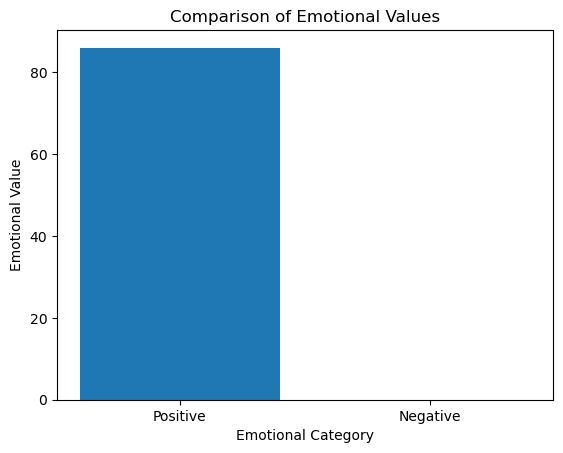

In [21]:
# Create a bar chart
plt.bar(['Positive', 'Negative'],[Pos_len,Neg_len])

# Customize the plot
plt.xlabel('Emotional Category')
plt.ylabel('Emotional Value')
plt.title('Comparison of Emotional Values')

# Display the plot
plt.show()

In [22]:
# We can Conclude that there are No Negative Emotions for the product i.e Iphone15promax